# PART 1

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd

#Load the dataset from a CSV file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=column_names)

# Preprocess the data
heart_data = heart_data.replace('?', pd.NA).dropna()  # Handling missing values
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(237, 13)
(237,)
(60, 13)
(60,)


In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(75, 4)
(75,)
(75, 4)
(75,)


![alt text](./imgs/part1.png)

# PART 2

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


depths = [1, 2, 3]  # Different depths (number of hidden layers)
nodes = [5, 10, 15]  # Different numbers of nodes in each hidden layer

for depth in depths:
    for node in nodes:
        mlp = MLPClassifier(hidden_layer_sizes=(node,) * depth, random_state=42, max_iter=2500)
        mlp.fit(X_train, y_train)
        y_pred = mlp.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"MLP with depth={depth} and {node} nodes: Accuracy = {accuracy}")
        # cm = confusion_matrix(y_test, y_pred)
        # sns.heatmap(cm, annot=True, fmt='d')
        # plt.show()


MLP with depth=1 and 5 nodes: Accuracy = 1.0
MLP with depth=1 and 10 nodes: Accuracy = 0.9733333333333334
MLP with depth=1 and 15 nodes: Accuracy = 0.9866666666666667
MLP with depth=2 and 5 nodes: Accuracy = 0.96
MLP with depth=2 and 10 nodes: Accuracy = 0.96
MLP with depth=2 and 15 nodes: Accuracy = 0.9733333333333334
MLP with depth=3 and 5 nodes: Accuracy = 0.9733333333333334
MLP with depth=3 and 10 nodes: Accuracy = 0.9466666666666667
MLP with depth=3 and 15 nodes: Accuracy = 0.96


## Result and Analysis

The accuracy scores are as follows and the results are quite good the data is labeled very good.


![alt text](./imgs/part2.png)

# PART 3

AdaBoost with MLP as base classifier: Accuracy = 0.6166666666666667


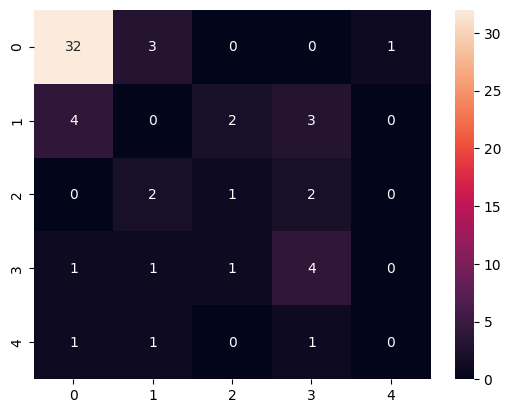

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

base_clf = Perceptron(random_state=42, max_iter=2500)
base_clf.fit(X_train, y_train)
y_pred = base_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Perceptron: Accuracy = {accuracy}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


adaBoost = AdaBoostClassifier(estimator=base_clf, random_state=42, algorithm='SAMME')
adaBoost.fit(X_train, y_train)
y_pred = adaBoost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"AdaBoost with MLP as base classifier: Accuracy = {accuracy}")

# draw confusion matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


## Result and Analysis

The accuracy scores and the confusion matrix are as follows:

Adding a perceptron layer to the model increased the accuracy score in proportion as %33. 

This is very good for boosting with single perceptron using same dataset. 


![alt text](./imgs/part3.png)

# PART 4

Random Decision Forest with Trainable Perceptrons: Accuracy = 0.5666666666666667


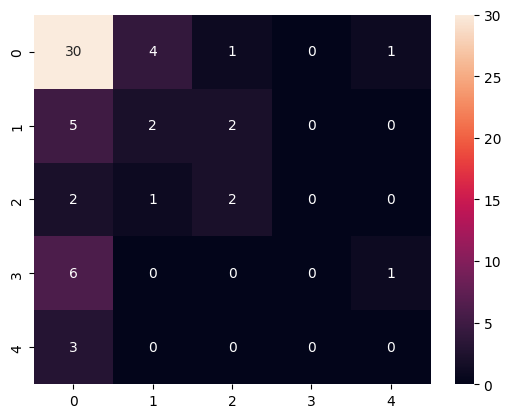

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import resample
import numpy as np

class TrainablePerceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, max_iterations=100):
        self.max_iterations = max_iterations
        self.perceptron = MLPClassifier(hidden_layer_sizes=(10,), random_state=42,  max_iter=2500)

    def fit(self, X, y):
        self.perceptron.fit(X, y)

    def predict(self, X):
        return self.perceptron.predict(X)

class RandomDecisionForest(BaseEstimator, ClassifierMixin):
    def __init__(self, n_estimators=10, max_iterations=100, random_state=None):
        self.n_estimators = n_estimators
        self.max_iterations = max_iterations
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            X_resampled, y_resampled = resample(X, y, random_state=self.random_state)
            perceptron = TrainablePerceptron(max_iterations=self.max_iterations)
            perceptron.fit(X_resampled, y_resampled)
            self.estimators.append(perceptron)

    def predict(self, X):
        predictions = []
        for estimator in self.estimators:
            predictions.append(estimator.predict(X))
        return np.mean(predictions, axis=0)
    

random_forest = RandomDecisionForest(n_estimators=20, max_iterations=2500, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Decision Forest with Trainable Perceptrons: Accuracy = {accuracy}")

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Result and Analysis


![alt text](./imgs/part4.png)